## Social dimensions of Eaton and Palisades fires


### Setup

In [ ]:
# Loading necessary libraries
import os              
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr   
import geopandas as gpd
import contextily as ctx

In [3]:
# Load Eaton perimeter data
fp = os.path.join('data/Eaton_Perimeter_20250121.shp')
eaton = gpd.read_file(fp)

# Load Palisades perimeter data
fp = os.path.join('data', 'Palisades_Perimeter_20250121.shp')
palisades = gpd.read_file(fp)


In [ ]:
# Load EJI
fp = os.path.join('data', 'EJI_2024_California.gdb')
eji = gpd.read_file(fp)


In [ ]:
# Display the first few rows of the EJI data
eji.head()

,OBJECTID,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY,StateDesc,STATEABBR,...,TWOMORE,E_TWOMORE,OTHERRACE,E_OTHERRACE,Tribe_PCT_Tract,Tribe_Names,Tribe_Flag,Shape_Length,Shape_Area,geometry
0,11620,06,077,005127,140000US06077005127,06077005127,06077005127,San Joaquin County,California,CA,...,408.0,5.4,0.0,0.0,0.0,-999,-999,5909.703135,1.962577e+06,"MULTIPOLYGON (((-2178538.439 328974.247, -2178..."
1,11557,06,077,003406,140000US06077003406,06077003406,06077003406,San Joaquin County,California,CA,...,203.0,5.4,0.0,0.0,0.0,-999,-999,3805.322542,8.541741e+05,"MULTIPOLYGON (((-2174646.947 350500.600, -2174..."
2,11594,06,077,004402,140000US06077004402,06077004402,06077004402,San Joaquin County,California,CA,...,132.0,2.2,0.0,0.0,0.0,-999,-999,8576.416378,4.345421e+06,"MULTIPOLYGON (((-2169306.156 358323.611, -2169..."
3,11617,06,077,005124,140000US06077005124,06077005124,06077005124,San Joaquin County,California,CA,...,161.0,4.8,0.0,0.0,0.0,-999,-999,4842.265671,1.085207e+06,"MULTIPOLYGON (((-2174819.146 325432.172, -2174..."
4,11509,06,077,001700,140000US06077001700,06077001700,06077001700,San Joaquin County,California,CA,...,160.0,3.8,0.0,0.0,0.0,-999,-999,5087.384776,1.686400e+06,"MULTIPOLYGON (((-2172633.856 343802.277, -2172..."


## 1. Metadata exploration
Review the CSV with the metadata information for the EJI data.
Look at the variables and with your team select a few variables that, in your opinion, could influence a community’s response to a wildfire. You’ll be working with some of them in the following exercises.

- E_RENTER	EP_RENTER

Percentile ranking of renter-occupied housing units (0-100)
Higher percentile = more renters compared to other tracts
Why it matters for wildfire: Renters often have less control over property hardening (fire-resistant materials), less attachment to community, and may face barriers to evacuation/recovery due to housing instability

- E_AGE65	EP_AGE65

Percentile ranking of population aged 65 and older (0-100)
Why it matters for wildfire: Elderly residents may have mobility limitations, health vulnerabilities, need assistance evacuating, and face longer recovery times

- E_POVERTY	EP_POVERTY

Percentile ranking of population below poverty level (0-100)
Why it matters for wildfire: Low-income communities may lack resources for preparedness, evacuation, and recovery, and may live in higher-risk areas due to affordable housing availability

In [6]:
# Match the CRS of the eji data to the fire perimeter
eji = eji.to_crs(palisades.crs)

## 2. Polygon intersection
Open the fire perimeters and the EJI data and do initial data exploration.

Spatially join the EJI data with the Palisades fire perimeter using geopandas.sjoin() to get a geopandas.GeoDataFrame that will have only have the census tracts intersecting the Palisades fire perimeter.

Create an exploratory map showing

the census tracts that intersect the Palisades fire perimeter and
the Palisades fire perimeter.

In [7]:
# Spatially join the EJI data with the Palisades fire perimeter using geopandas.sjoin() to get a geopandas.GeoDataFrame that will have only have the census tracts intersecting the Palisades fire perimeter.
pali_eji = gpd.sjoin(eji.to_crs(palisades.crs), palisades, how="inner")
pali_eji.head()


,OBJECTID_left,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY,StateDesc,STATEABBR,...,Tribe_Names,Tribe_Flag,Shape_Length,Shape_Area,geometry,index_right,OBJECTID_right,type,Shape__Are,Shape__Len
1328,6505,06,037,262706,140000US06037262706,06037262706,06037262706,Los Angeles County,California,CA,...,-999,-999,6486.563559,2.147847e+06,"MULTIPOLYGON (((-13195148.412 4033844.678, -13...",0,1,Heat Perimeter,1182.082031,267.101144
1328,6505,06,037,262706,140000US06037262706,06037262706,06037262706,Los Angeles County,California,CA,...,-999,-999,6486.563559,2.147847e+06,"MULTIPOLYGON (((-13195148.412 4033844.678, -13...",1,2,Heat Perimeter,2222.488281,185.498783
1328,6505,06,037,262706,140000US06037262706,06037262706,06037262706,Los Angeles County,California,CA,...,-999,-999,6486.563559,2.147847e+06,"MULTIPOLYGON (((-13195148.412 4033844.678, -13...",2,3,Heat Perimeter,21.011719,22.412814
1328,6505,06,037,262706,140000US06037262706,06037262706,06037262706,Los Angeles County,California,CA,...,-999,-999,6486.563559,2.147847e+06,"MULTIPOLYGON (((-13195148.412 4033844.678, -13...",9,10,Heat Perimeter,79397.949219,2620.515743
1328,6505,06,037,262706,140000US06037262706,06037262706,06037262706,Los Angeles County,California,CA,...,-999,-999,6486.563559,2.147847e+06,"MULTIPOLYGON (((-13195148.412 4033844.678, -13...",10,11,Heat Perimeter,22.070312,21.680935


<Axes: >

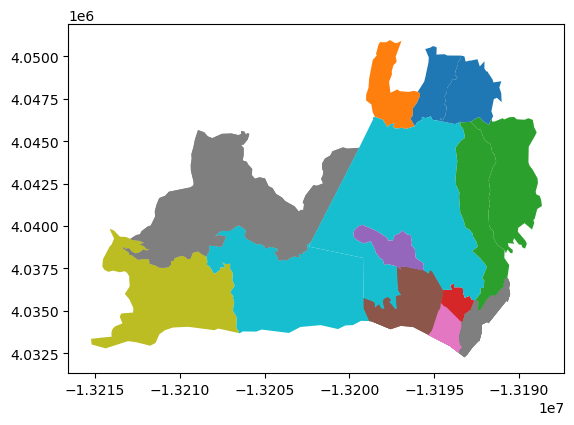

In [8]:
# Plot the joined data
pali_eji.plot('TRACTCE')

<Axes: >

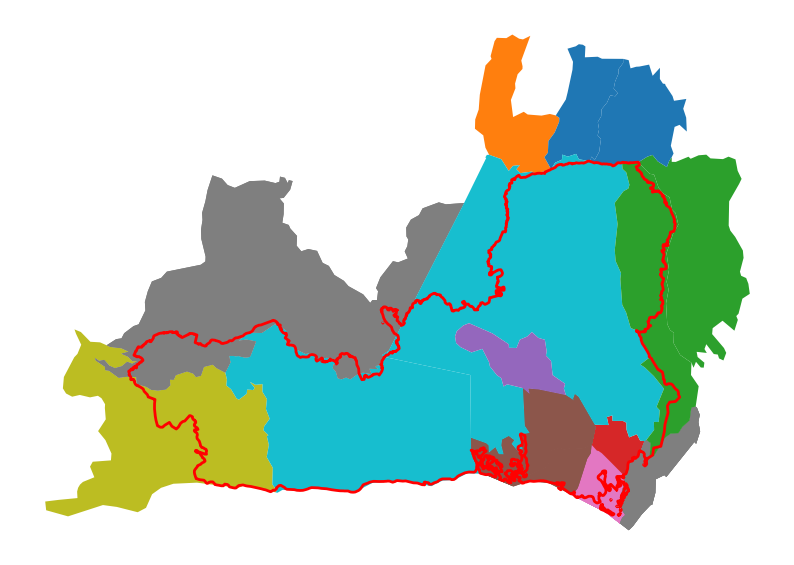

In [9]:
# Plot the Palisades fire perimeter and the intersecting EJI census tracts
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')
palisades.boundary.plot(ax=ax, color='red', linewidth=2, label='Palisades Fire Perimeter')
pali_eji.plot('TRACTCE', ax=ax)

Discuss how big is the Eaton fire perimeter in relation to the census tracts intersectig the Eaton fire perimeter.

Intersects makes the inclusion of any census tract that touches the fire perimeter even if it is a very small portion of the tract. Census tracts are relatively large areas and the fire perimeter is relatively small. Therefore, it is likely that many census tracts will be included in the intersection even if only a small part of the tract is affected by the fire. This can lead to an overestimation of the area affected by the fire when using intersects.

<Axes: >

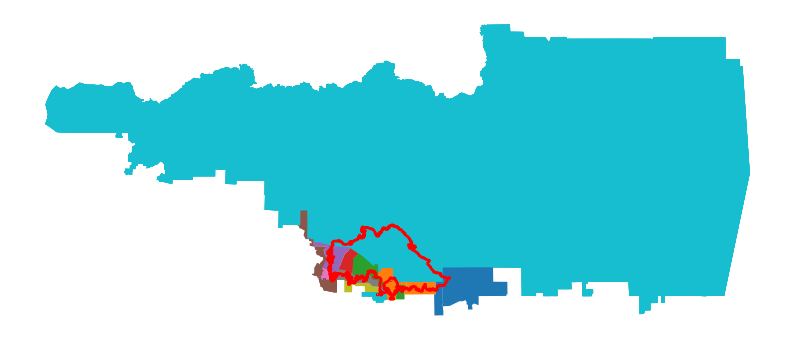

In [ ]:
# Join EJI data with Eaton fire perimeter
eaton_eji = gpd.sjoin(eji.to_crs(eaton.crs), eaton, how="inner")

# Plot the joined data whith Eaton fire perimeter
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')
eaton.boundary.plot(ax=ax, color='red', linewidth=2, label='Eaton Fire Perimeter')
eaton_eji.plot('TRACTCE', ax=ax)


## 3. Polygon clipping

Clip the census tracts to the Palisades fire perimeter using geopandas.clip().
Do the same for the Eaton fire perimeter.
Quickly visualize your data.

<Axes: >

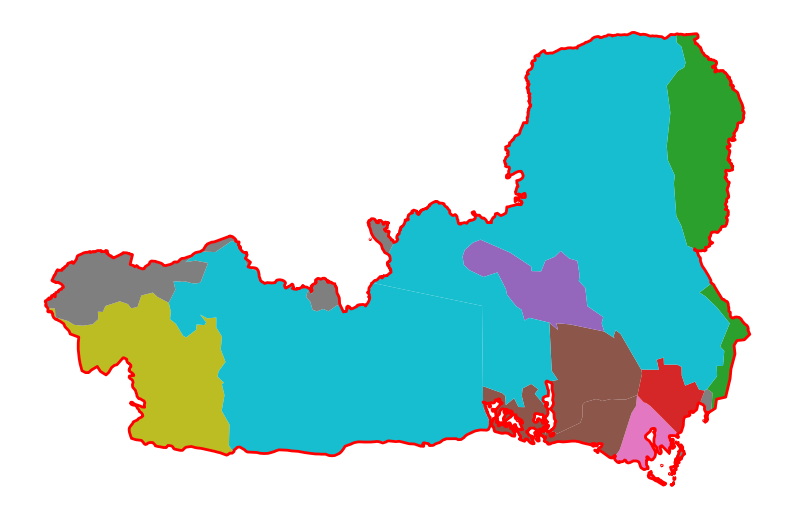

In [ ]:
# Clip the census tracts to the Palisades fire perimeter using geopandas.clip()
eji_pali = gpd.clip(eji, palisades)

# Plot the clipped data
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')
palisades.boundary.plot(ax=ax, color='red', linewidth=2, label='Eaton Fire Perimeter')
eji_pali.plot('TRACTCE', ax=ax)


In [ ]:
# Clip the census tracts to the Eaton fire perimeter using geopandas.clip()
eji_eaton = gpd.clip(eji, eaton)

<Axes: >

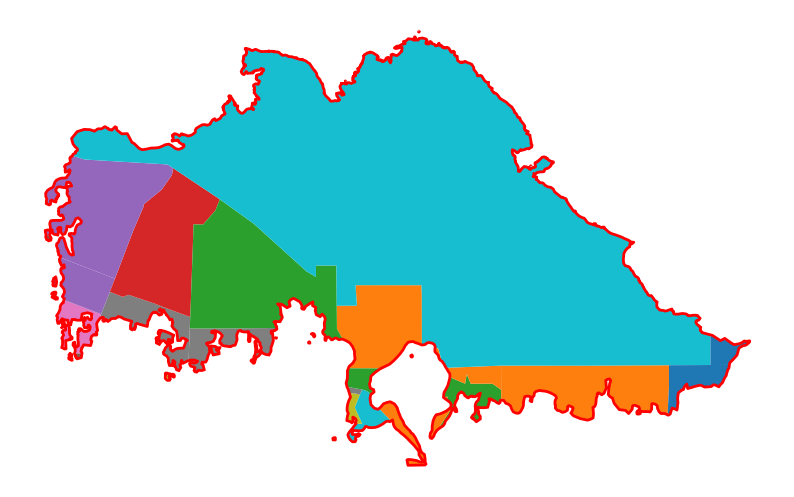

In [15]:
# Plot the eaton clipped data
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')
eaton.boundary.plot(ax=ax, color='red', linewidth=2, label='Eaton Fire Perimeter')
eji_eaton.plot('TRACTCE', ax=ax)

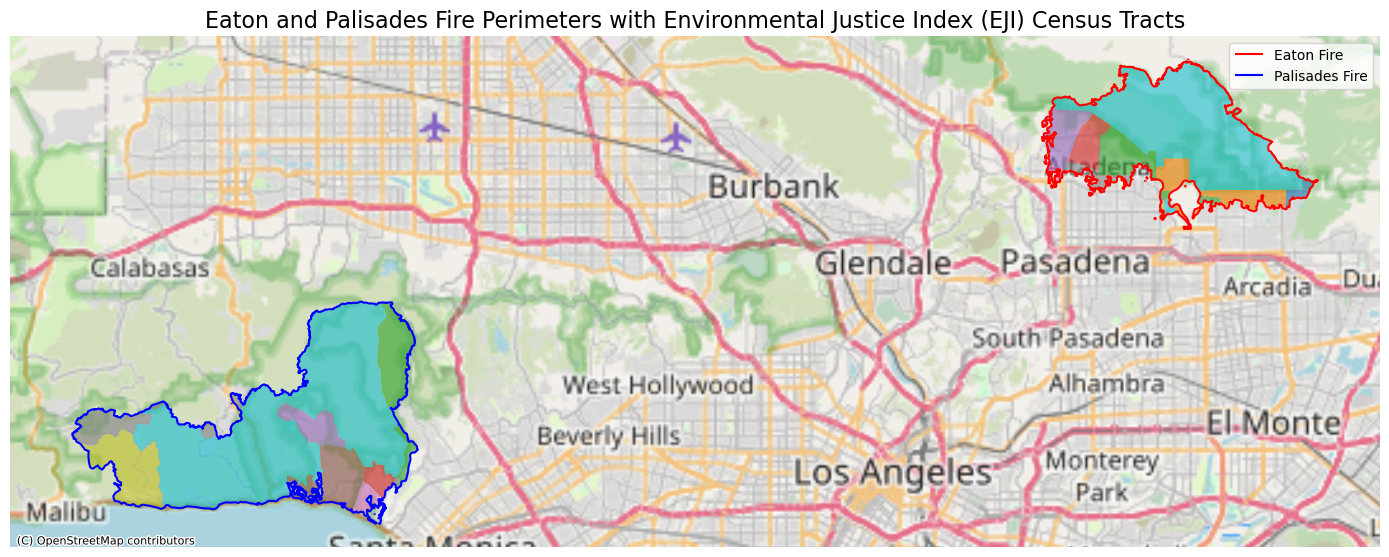

In [ ]:
# Set up the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# Add fire perimeters
eaton.boundary.plot(ax=ax, edgecolor='red', label='Eaton Fire')
palisades.boundary.plot(ax=ax, edgecolor='blue', label='Palisades Fire')
ax.legend()

# Plot EJI census tracts intersecting both fires
eji_eaton.plot('TRACTCE',alpha=0.6, ax=ax)
eji_pali.plot('TRACTCE',alpha=0.6, ax=ax)

# Add legend
plt.legend()

# Add title
plt.title('Eaton and Palisades Fire Perimeters with Environmental Justice Index (EJI) Census Tracts', fontsize=16)

# Add basemap using contextily
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.axis('off')


In [ ]:

plt.tight_layout()
plt.show()

## 5. Visualize EJI data

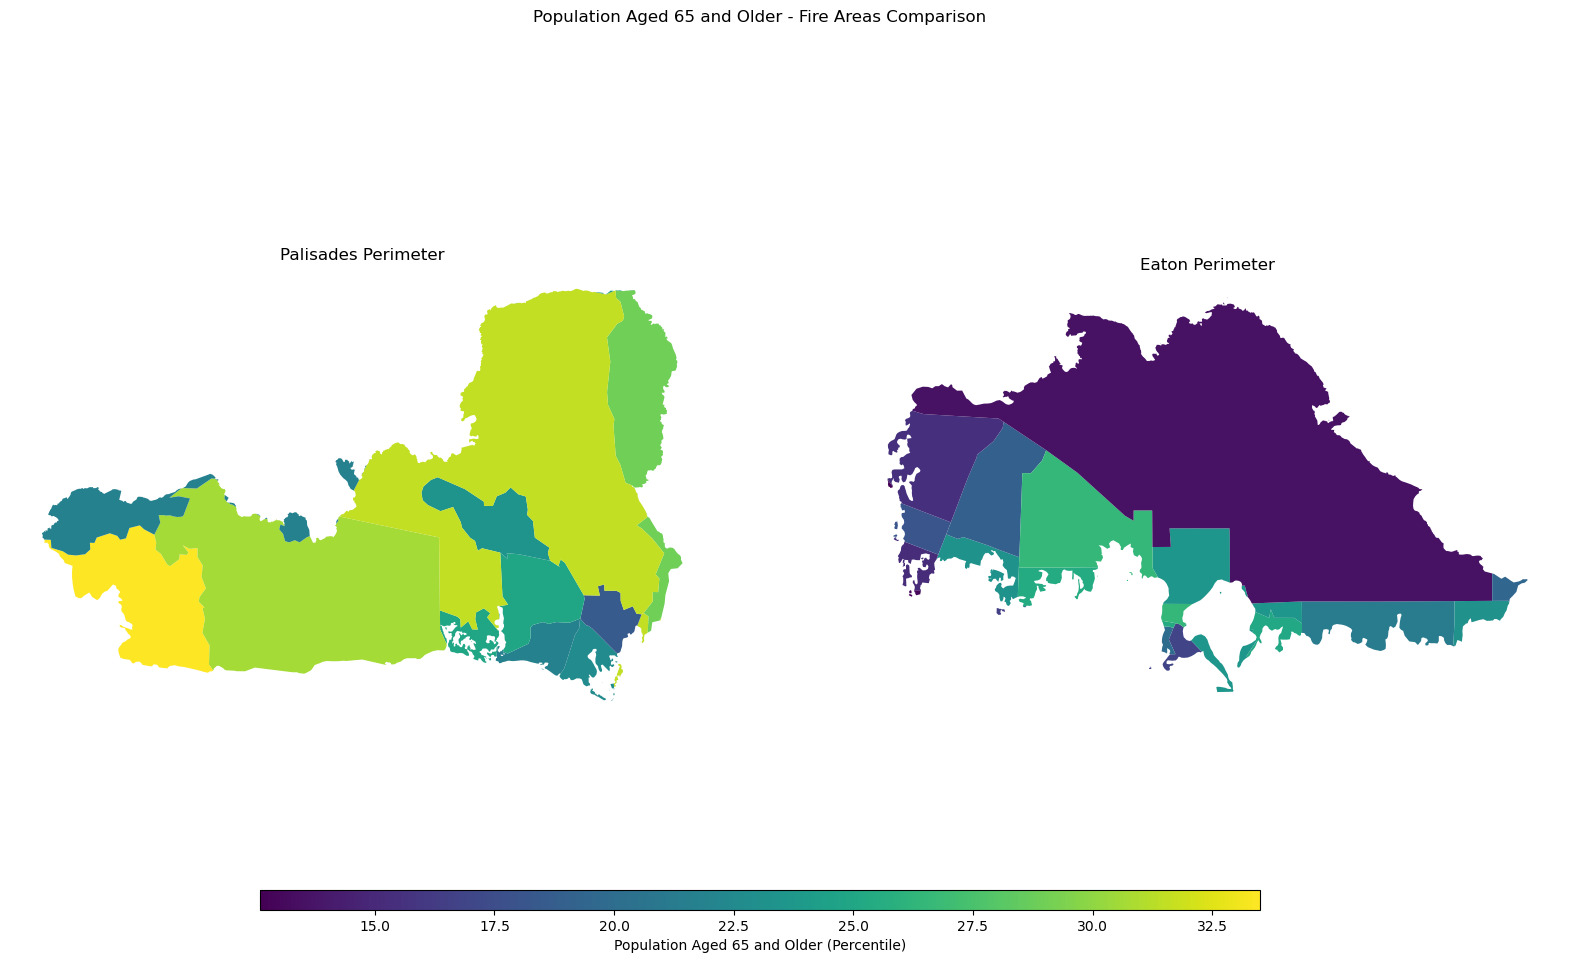

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# UPDATE WITH YOU EJI VARIABLE FROM STEP 1
eji_variable = 'E_AGE65'

# Find common min/max for legend range
vmin = min(eji_pali[eji_variable].min(), eji_eaton[eji_variable].min())
vmax = max(eji_pali[eji_variable].max(), eji_eaton[eji_variable].max())

# Plot census tracts within Palisades perimeter
eji_pali.plot(
    column= eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax1,
)
ax1.set_title('Palisades Perimeter')
ax1.axis('off')

# Plot census tracts within Eaton perimeter
eji_eaton.plot(
    column=eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax2,
)
ax2.set_title('Eaton Perimeter')
ax2.axis('off')

# Add overall title
fig.suptitle('Population Aged 65 and Older - Fire Areas Comparison')

# Add shared colorbar at the bottom
sm = plt.cm.ScalarMappable( norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Population Aged 65 and Older (Percentile)')

plt.show()

### Interpreting EJI data

write a short paragraph discussing how or whether this variable is distributed differently across the two fire perimeters. What kind of implications could this have in terms of wildifre relief?

The variable Population Aged 65 and Older (E_AGE65) shows a different distribution across the two fire perimeters. In the Palisades fire perimeter, there is a higher concentration of census tracts with elevated percentiles of elderly residents compared to the Eaton fire perimeter. This suggests that the Palisades area have a larger proportion of older adults who could face greater challenges during wildfire events, such as mobility issues and health vulnerabilities. Consequently, wildfire relief efforts in the Palisades area may need to prioritize resources for evacuation assistance, medical support, and community outreach tailored to the needs of elderly residents. In contrast, the Eaton fire perimeter may require different strategies focused on other demographic factors present in that area.

